In [1]:
#!/usr/bin/python3

In [2]:
import mne
import os
from pathlib import Path
from mne_bids import BIDSPath, read_raw_bids

In [3]:
# Read BIDS Path
bids_root = Path('eeg_matchingpennies')
bids_path = BIDSPath(subject = '05',
                     task = 'matchingpennies',
                     datatype = 'eeg',
                     root = bids_root)
raw = read_raw_bids(bids_path)

Extracting parameters from eeg_matchingpennies/sub-05/eeg/sub-05_task-matchingpennies_eeg.vhdr...
Setting channel info structure...
Reading events from eeg_matchingpennies/sub-05/eeg/sub-05_task-matchingpennies_events.tsv.
Reading channel info from eeg_matchingpennies/sub-05/eeg/sub-05_task-matchingpennies_channels.tsv.
/home/ubuntu/.local/lib/python3.8/site-packages/mne_bids/path.py:1065: RuntimeWarning: Did not find any coordsystem.json associated with sub-05_task-matchingpennies.

The search_str was "eeg_matchingpennies/sub-05/**/sub-05*coordsystem.json"
  warn(msg)
/home/ubuntu/.local/lib/python3.8/site-packages/mne_bids/path.py:1065: RuntimeWarning: Did not find any eeg.json associated with sub-05_task-matchingpennies.

The search_str was "eeg_matchingpennies/sub-05/**/sub-05*eeg.json"
  warn(msg)


In [4]:
# extract events and event_id from our raw object
events, event_id = mne.events_from_annotations(raw)

Used Annotations descriptions: ['left', 'right']


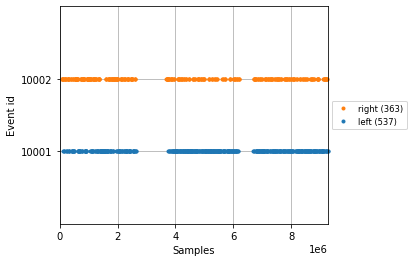

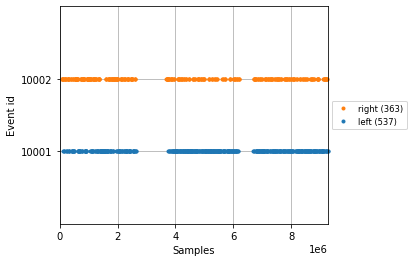

In [5]:
# we can go ahead and plot the events 
mne.viz.plot_events(events, event_id = event_id)

Not setting metadata
Not setting metadata
900 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 900 events and 3501 original time points ...
0 bad epochs dropped


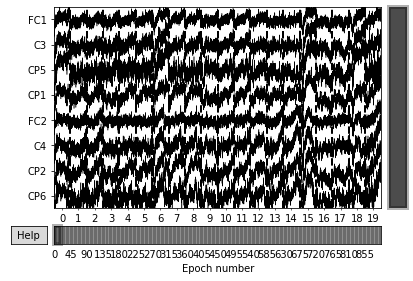

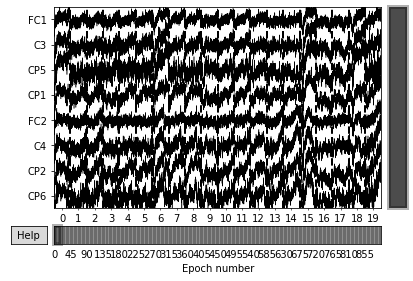

In [9]:
# create an epoch object
epochs = mne.Epochs(raw, events, event_id=event_id,preload=True)


In [22]:
print(epochs.info)
len(epochs)

<Info | 9 non-empty values
 bads: 2 items (FC5, FC6)
 ch_names: FC5, FC1, C3, CP5, CP1, FC2, FC6, C4, CP2, CP6
 chs: 10 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 2500.0 Hz
 meas_date: unspecified
 nchan: 10
 projs: []
 sfreq: 5000.0 Hz
 subject_info: 4 items (dict)
>


900

Not setting metadata
Not setting metadata
363 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
<ipython-input-17-d87b887f066d>:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs['right'].plot_image(picks=[0])


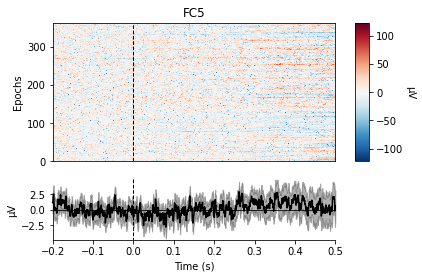

[<Figure size 432x288 with 3 Axes>]

In [17]:
epochs['right'].plot_image(picks=[0])

Not setting metadata
Not setting metadata
537 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
<ipython-input-20-610a33069484>:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs['left'].plot_image(picks=[0])


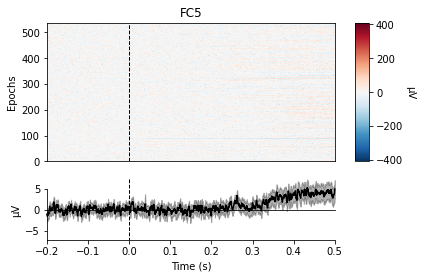

[<Figure size 432x288 with 3 Axes>]

In [20]:
epochs['left'].plot_image(picks=[0])

In [21]:
print(epochs[['left','right']])

<Epochs |  900 events (all good), -0.2 - 0.5 sec, baseline [-0.2, 0] sec, ~240.4 MB, data loaded,
 'left': 537
 'right': 363>


In [23]:
epochs.tmin

-0.2

In [24]:
epochs.tmax

0.5